# Example using a standalone SOBOL sequence generator

Functions and Classes:
- SobolIterator: A class from the BO_Iterator module that generates a sequence of parameters using the Sobol method.
- SyntheticGaussian: A class from the BO_Iterator module that defines a synthetic Gaussian objective function.

Main Steps:
1. Define the objective function using SyntheticGaussian with specified centers, sigma, and number of samples.
2. Initialize the SobolIterator with parameter names, bounds, number of Sobol samples, and the objective function.
3. Iterate over the generated parameter sets, evaluate the objective function for each set, and record the results.
4. Retrieve all recorded data from the iterator.
5. Plot the Sobol parameters against the observed objective values using a scatter plot with a color bar indicating the objective values.

In [2]:
from BO_Iterator import SobolIterator, SyntheticGaussian

# Define the optimization params
param_names = ["x0", "x1"]
param_bounds = [(0, 1), (0, 1)]

# Define the objective function
objective_function = SyntheticGaussian(centers=[0.5, 0.5], sigma=0.1, n_samples=1).read

# Initialize the Sobol Iterator
iterator = SobolIterator(
    param_names=param_names,
    param_bounds=param_bounds,
    n_sobol=int(1e5),         # Number of Sobol samples
    objective_function=objective_function,  # Objective function to evaluate
    threshold=0.9995,         # Stopping threshold
    maximize=True,            # Whether to maximize or minimize
)

# Run the optimization loop
trial = 0
for params_dict in iterator:
    # Evaluate the objective (optional, since the iterator does this internally)
    objectives_tuple = iterator.evaluate_objective(params_dict)
    trial += 1

# Retrieve the best params and objectives
best_result = {
    "params": iterator.best_params,
    "objectives": iterator.best_objectives
}

# Retrieve all recorded observations
data = iterator.get_all_observations()

# Display results
print("Best Result:", best_result)


Stopping early: threshold exceeded.
Best Result: {'params': {'x0': 0.5010515451431274, 'x1': 0.49985814094543457}, 'objectives': 0.9999437080254828}


In [4]:
data['best_result']

{'params': {'x0': 0.5010515451431274, 'x1': 0.49985814094543457},
 'objectives': 0.9999437080254828}

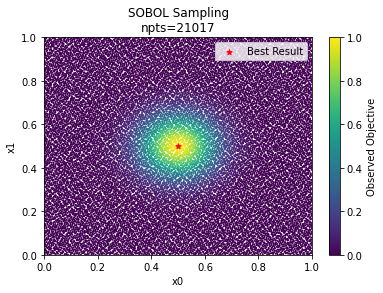

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract param names from the iterator
param_names = iterator.param_names

# Convert the list of dicts into a NumPy array for plotting
sobol_params = np.array([[p[name] for name in param_names] for p in data["params"]])

# Extract only the mean from each (mean, sem) tuple
obj_means = [obj_tuple[0] for obj_tuple in data["objectives"]]

# Create scatter plot of all sampled points
scatter = plt.scatter(
    sobol_params[:, 0], 
    sobol_params[:, 1], 
    c=obj_means, 
    s=1
)

# Highlight the best result
best_scatter = plt.scatter(
    best_result["params"]["x0"], 
    best_result["params"]["x1"], 
    c="red", 
    s=30, 
    label="Best Result", 
    marker="*"
)

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("Observed Objective")

# Axis labels, title, limits
plt.xlabel("x0")
plt.ylabel("x1")
plt.title(f"SOBOL Sampling\nnpts={trial-1}")
plt.xlim(param_bounds[0][0], param_bounds[0][1])
plt.ylim(param_bounds[1][0], param_bounds[1][1])

# Set the color range to [0, 1], matching your objective's typical scale
scatter.set_clim(0, 1)

# Show legend and plot
plt.legend(loc="upper right")
plt.show()
